## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.
tf.compat.v1.disable_eager_execution()


#### Answer the following question by providing Python code:

In [2]:
# Bring the data.
housing_data = fetch_california_housing()

In [3]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [4]:
data = housing_data.data
data_labels = housing_data.feature_names

target = housing_data.target
target_label = housing_data.target_names

housing = pd.DataFrame(data=np.hstack((data, target.reshape(-1, 1))), columns=[data_labels+target_label][0])

In [5]:
housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

## Preprocessing

<Figure size 1080x1080 with 0 Axes>

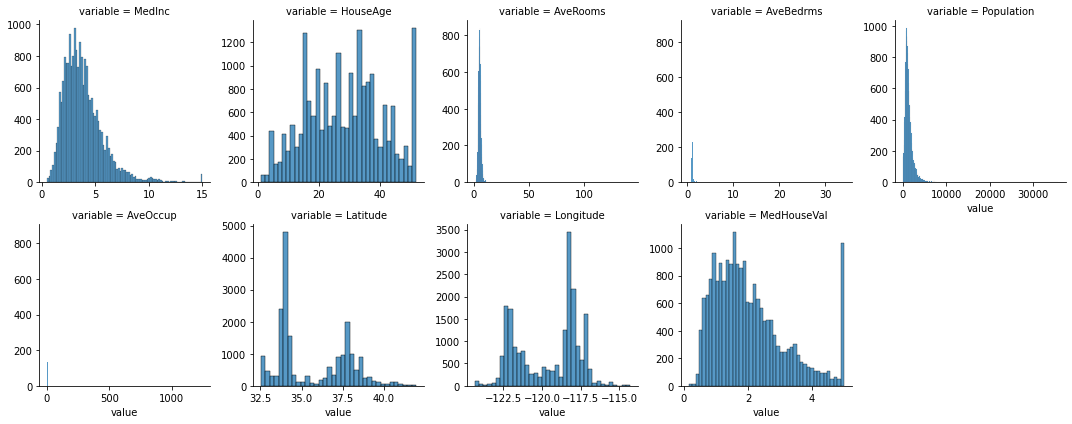

In [6]:
plt.figure(figsize=(15,15))
f = pd.melt(housing)
facet = sns.FacetGrid(f, col_wrap=5, col="variable", sharex=False, sharey=False)
facet = facet.map(sns.histplot, "value", kde=False)
plt.show()

In [7]:
# scaling the numerical feautures
categorical_features = ["AveRooms", "AveBedrms", "AveOccup"]
numerical_features = [feature for feature in housing.columns if feature not in categorical_features]

housing_numerical = housing[numerical_features[:-1]]
housing_categorical = housing[categorical_features]

housing_numerical = scale(housing_numerical)
X = np.hstack((housing_numerical, housing_categorical))
Y = housing.MedHouseVal.values

In [8]:
X.shape, Y.shape

((20640, 8), (20640,))

In [9]:
# Splitting Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

## Building the Linear Regression Model

In [11]:
learn_rate = .001
epochs = 5000


W = tf.Variable(initial_value=tf.ones((X.shape[1],1)))                # Initial value of the weights = 1.
b = tf.Variable(1.)                                                         # Initial value of the bias = 1.

X_ph = tf.compat.v1.placeholder(tf.float32)
Y_ph= tf.compat.v1.placeholder(tf.float32)

y_model = tf.matmul(X_ph, W) + b

loss  = tf.reduce_mean(tf.keras.losses.mean_squared_error(Y_ph, y_model))        # Loss = Mean Squared Error. 


### Training

In [12]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learn_rate)
train = optimizer.minimize(loss)                 # Define training.
init = tf.compat.v1.global_variables_initializer()                # Define Variable initialization.

with tf.device("/GPU:0"):
   with tf.compat.v1.Session() as sess:
      # Initializing Variables
      sess.run(init)
      
      
      # Training
      feed = {X_ph:X_train, Y_ph:Y_train}                        # feed data
           
      for i in range(epochs):
         # run training 
         sess.run(train, feed_dict=feed)
         
         if (i + 1) % 1000 == 0:
            print("Epoch %d" % (i + 1))         
      
      # W_model, b_model = sess.run([W, b])     # No need for this, since we're getting the testing loss results right away              

      # Calculating Losses
      mse_value_train = sess.run(loss, feed_dict = feed)            # Calculate the in-sample MSE (training)
      mse_value_val = sess.run(loss, feed_dict = {X_ph:X_val, Y_ph:Y_val})            # Calculate the out-sample MSE (validation)
      mse_value_test = sess.run(loss, feed_dict = {X_ph:X_test, Y_ph:Y_test})            # Calculate the out-sample MSE (testing)

Epoch 1000


### Metrics

In [ ]:
print("Training\n------------------------------")
print("MSE  = {:5.3f} | RMSE = {:5.3f}".format(mse_value_train, np.sqrt(mse_value_train)))

Training
------------------------------
MSE  = 1.448 | RMSE = 1.203
Validation
------------------------------
MSE  = 1.416 | RMSE = 1.190


In [ ]:
print("Testing\n-------------------------------")
print("MSE  = {:5.3f} | RMSE = {:5.3f}".format(mse_value_test, np.sqrt(mse_value_test)))

Testing
-------------------------------
MSE  = 1.452 | RMSE = 1.205
